In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df1 = pd.read_csv('03_Cleaned_File(Data Preprocessing).csv')

In [3]:
df1.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [4]:
X = df1.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df1['Exited']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
X_train.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
4032,601,0,42,199242.65,96763.89,1,1,4,1,0,1
4374,614,0,34,185561.89,0.00,2,0,5,0,0,0
6695,638,1,41,47675.29,131762.94,1,1,1,1,0,0
4896,544,0,40,161076.92,0.00,1,1,7,1,0,0
1101,512,0,32,80120.19,123403.85,2,0,2,0,1,0


In [7]:
scaler = StandardScaler()
columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [8]:
X_train.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
4032,-0.512578,0,0.290520,1.719893,0.319718,1,1,4,1,0,1
4374,-0.377979,0,-0.467682,1.482642,-1.227900,2,0,5,0,0,0
6695,-0.129489,1,0.195745,-0.908576,0.879483,1,1,1,1,0,0
4896,-1.102743,0,0.100970,1.058026,-1.227900,1,1,7,1,0,0
1101,-1.434063,0,-0.657233,-0.345919,0.745790,2,0,2,0,1,0


In [9]:
y_train.value_counts()

Exited
0    5992
1    1505
Name: count, dtype: int64

In [10]:
under_sampling = RandomUnderSampler(random_state = 42)
X_train, y_train = under_sampling.fit_resample(X_train, y_train)

In [11]:
y_train.value_counts()

Exited
0    1505
1    1505
Name: count, dtype: int64

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    # 'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight' : ['balanced']
}

In [13]:
rf = RandomForestClassifier(random_state = 42)

In [14]:
scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = scoring,
                           refit = 'recall'
)


In [15]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [16]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [17]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [18]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[1570,  140],
       [ 398,  392]], dtype=int64)

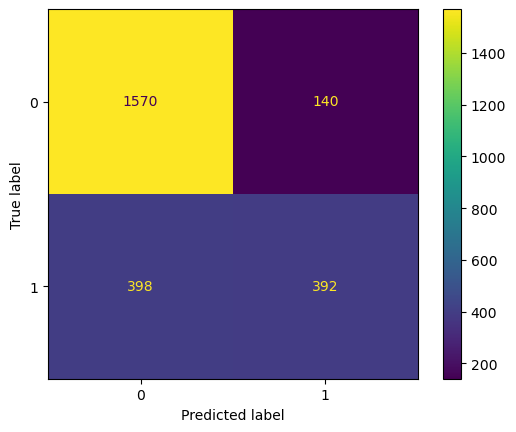

In [19]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [20]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.92
Class 1 Accuracy: 0.50


In [21]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.78
Precision : 0.50
Recall : 0.74
F1 Score : 0.59


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1968
           1       0.50      0.74      0.59       532

    accuracy                           0.78      2500
   macro avg       0.71      0.77      0.72      2500
weighted avg       0.83      0.78      0.80      2500

